In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [64]:
df.drop(columns='stab', inplace=True)

In [65]:
x = df.iloc[:,:-1]
y = df.stabf

In [69]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2 , random_state=1) 

In [74]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
normalised_train_df = scaler.fit_transform(x_train) 
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train.columns) 

x_test = x_test.reset_index(drop= True ) 
normalised_test_df = scaler.transform(x_test) 
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns) 

What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 1)
model.fit(normalised_train_df, y_train)

RandomForestClassifier(random_state=1)

In [40]:
new_prediction = model.predict(normalised_test_df)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=new_prediction) 
round(accuracy, 4 ) 

0.9195

What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [77]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=1)
model.fit(normalised_train_df, y_train)

LGBMClassifier(random_state=1)

In [78]:
new_prediction = model.predict(normalised_test_df)

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=new_prediction) 
round(accuracy, 4 ) 

0.9375

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_forest = ExtraTreesClassifier(random_state=1)
extra_tree_forest.fit(normalised_train_df, y_train)
  
feature_importance = extra_tree_forest.feature_importances_

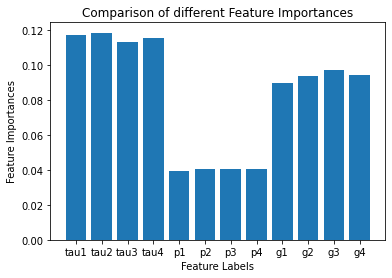

In [93]:
# Plotting a Bar Graph to compare the models
plt.bar(normalised_train_df.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [95]:
model = ExtraTreesClassifier(random_state = 1)
model.fit(normalised_train_df, y_train)

ExtraTreesClassifier(random_state=1)

In [96]:
pred = model.predict(normalised_test_df)
accuracy = accuracy_score(y_true=y_test, y_pred=pred) 
round(accuracy, 4 ) 

0.928

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

space = { 'n_estimators':np.arange(3,20),
         'criterion':['gini','entropy'],
         'max_depth':[None, 3, 5, 8],
         'min_samples_split':np.arange(2,10)}
search = RandomizedSearchCV(model, space, random_state=1)
result = search.fit(normalised_train_df, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

The accuracy is lower than the initial ExtraTreesClassifier

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV

In [109]:
from sklearn.model_selection import RandomizedSearchCV

space = { 'n_estimators':[100, 300, 500,1000],
         'min_samples_leaf':[4, 6, 8],
         'max_features':['auto', 'sqrt',  'log2', None],
         'min_samples_split':[2,5,7]}
search = RandomizedSearchCV(model, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=1, verbose=1)
result = search.fit(normalised_train_df, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.9440000000000002
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}


What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [101]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1)
model.fit(normalised_train_df, y_train)

XGBClassifier(random_state=1)

In [102]:
new_prediction = model.predict(normalised_test_df)

In [103]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=new_prediction) 
round(accuracy, 4 ) 

0.9195